##Lab - Build your first Neural Network  with Keras!
In this section, we will look at the basic architecture of neural networks, the building blocks on which all complex neural networks are based. We will also code up our neural network using Keras, an high-level neural networks API, written in Python and capable of running on top of TensorFlow, . This exercise will help you gain an intuitive understanding of the inner workings of neural networks.

To illustrate a small neural network, you will build a model to predict car engine state:  
- **Green** indicates the engine runs optimally.  
- **Orange** indicates the engine  is operating in sub-optimal condition; as a consequence auto-tuning is triggered (adaptive air/fuel ratio).  
- **Red** indicates the engine is in overload; as a consequence the rev limitor is triggered to avoid any damage while auto-tuning kicks in.

The input layer uses the month of the year and the external temperature.

![alt text](http://i.ibb.co/YdLrwJX/Screenshot-2019-10-09-at-16-40-16.png)

## 1. Loading libraries and generating data


In [1]:
import numpy as np
import pandas as pd

temp= np.random.random(size=(1000,1)) #temperature are divided by 100 to fit the 0,1 interval
month=(np.random.randint(1,13,1000))/10    #months are fitted in the 0,1 interval
month1=np.around(month, decimals=1)    #months are rounded to one decimal
month2=np.reshape(month1, (1000,1))
state=np.ones((1000,1))
data=np.concatenate((month2,temp,state),axis=1)
    

In [2]:
for i in range(len(data)):
  #if (data[i,1] > 0.45) & (data[i,1]<0.65) :
     #data[i,2]=1
  #elif data[i,1] < 0.45 :
    #data[i,2]=0
  if (data[i,1] < 0.45 and data[i,1] > 0.25 and (data[i,0]<0.3 or data[i,0]>1.0)):
    data[i,2]=1
  elif (data[i,1] > 0.45 and data[i,1] < 0.65 and (data[i,0]>0.5 and data[i,0]<0.9)):
    data[i,2]=0
  elif data[i,1] < 0.45 :
    data[i,2]=0
  elif (data[i,1] > 0.45) & (data[i,1]<0.65) :
     data[i,2]=1
  elif (data[i,1] > 0.65 and data[i,1] < 0.88 and (data[i,0]>0.3 and data[i,0]<1.0)):
    data[i,2]=1
  else :
     data[i,2]=2

data    

df = pd.DataFrame(data, columns = ['month', 'temperature','state'])
df['state']=df['state'].astype('int')
df.head(10)



,month,temperature,state
0,0.8,0.184353,0
1,0.5,0.408219,0
2,0.2,0.718653,2
3,1.2,0.057131,0
4,0.9,0.222872,0
5,0.5,0.380930,0
6,0.1,0.490329,1
7,0.4,0.562860,1
8,1.0,0.288522,0
9,0.4,0.007560,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


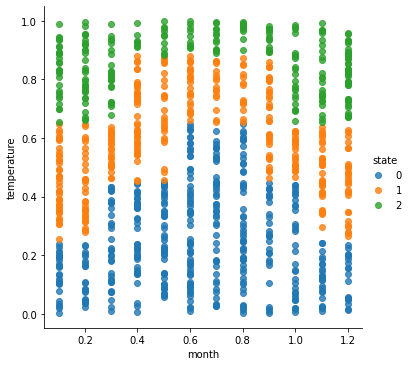

In [3]:
import seaborn as sns

sns.lmplot("month", "temperature", hue="state", data=df, fit_reg=False)


**Temperature** ranges from 0 to 10 (been divided by 100)  
**Month** ranges from 0.1 to 1.2 (been divided by 10)

## 2. Splitting X and y into training and testing sets

In [4]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'state']
y = df.loc[:, 'state']

X.head()

,month,temperature
0,0.8,0.184353
1,0.5,0.408219
2,0.2,0.718653
3,1.2,0.057131
4,0.9,0.222872


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [8]:
# default split is 80% for training and 20% for testing
print(y_train.shape)
print(y_test.shape)


(800,)
(200,)


## 3.  Building the neural network model

We choose to build a classifier with **two hidden layers** (16 and 8 neurons respectively) and an **output** layer with three neurons reprensenting the three different state of the engine.  
Activation:   
- Hidden Layer uses Relu.  **Relu** activationn: the **ReLU** activation function activates a node only if the input is above zero. If the input is below zero, the output is always zero  
- Output layer uses the **softmax** activation: the **Softmax** function is the go to function that you will often use at the output layer of a classifier when you are working on a problem that you need to predict a class between more than 2 classes. Softmax can work fine if you are classifying two classes as well. It will basically work as a sigmoid function


Then, **we have a total of 191 parameters (total number of weights + total number of bias) in this very simple network**. The values of these weights are randomly initialized then the network performs feedforward and backpropagation to learn the best values of weights that most fit our model to the training data.

![alt text](http://i.ibb.co/YdLrwJX/Screenshot-2019-10-09-at-16-40-16.png)

In [17]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential([
    Dense(16, input_shape=(2,), activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(Adam(lr=.005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Optimizer**: Let's use the adam optimizer, which is a popular optimizer in Keras. For most datasets, the adam optimizer will work well without much tuning.   
**Loss function**: We'll use categorical_crossentropy as our loss function since the problem at hand is a multiclass classification problem.  
**Metrics**: We'll use accuracy (that is, the percentage of correctly classified samples) as our evaluation metric.

![alt text](http://i.ibb.co/YdLrwJX/Screenshot-2019-10-09-at-16-40-16.png)

## 4. Training the model  
To train our neural net model defined in earlier steps, let's call the fit function. Let's train our model for 100 iterations:

In [19]:
# Train the model for 200 epochs
#model.fit(X_train, y_train, epochs=10)
nepochs=100
out= model.fit(X_train, y_train, epochs=nepochs, validation_data=(X_test,y_test), shuffle=True, verbose=2)

Epoch 1/100
25/25 - 0s - loss: 0.8998 - accuracy: 0.6212 - val_loss: 0.8692 - val_accuracy: 0.6250
Epoch 2/100
25/25 - 0s - loss: 0.7677 - accuracy: 0.6288 - val_loss: 0.7447 - val_accuracy: 0.7500
Epoch 3/100
25/25 - 0s - loss: 0.6623 - accuracy: 0.7275 - val_loss: 0.6528 - val_accuracy: 0.7200
Epoch 4/100
25/25 - 0s - loss: 0.5901 - accuracy: 0.7525 - val_loss: 0.5971 - val_accuracy: 0.7150
Epoch 5/100
25/25 - 0s - loss: 0.5353 - accuracy: 0.7575 - val_loss: 0.5399 - val_accuracy: 0.7700
Epoch 6/100
25/25 - 0s - loss: 0.4977 - accuracy: 0.7900 - val_loss: 0.5052 - val_accuracy: 0.7700
Epoch 7/100
25/25 - 0s - loss: 0.4606 - accuracy: 0.7987 - val_loss: 0.4896 - val_accuracy: 0.7800
Epoch 8/100
25/25 - 0s - loss: 0.4485 - accuracy: 0.8050 - val_loss: 0.4449 - val_accuracy: 0.8150
Epoch 9/100
25/25 - 0s - loss: 0.4070 - accuracy: 0.8263 - val_loss: 0.4118 - val_accuracy: 0.8300
Epoch 10/100
25/25 - 0s - loss: 0.3779 - accuracy: 0.8275 - val_loss: 0.3881 - val_accuracy: 0.8200
Epoch 11/

Text(0, 0.5, 'accuracy')

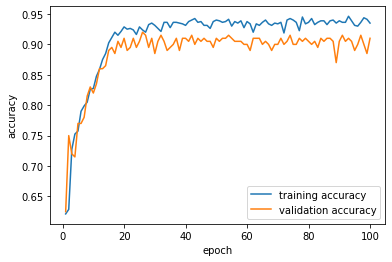

In [25]:
import matplotlib.pyplot as plt
# Plotting the accuracies
plt.figure()
plt.plot(np.arange(nepochs)+1,out.history['accuracy'],label='training accuracy')
plt.plot(np.arange(nepochs)+1,out.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

## 5. Making Prediction
Please enter below the month divide by 10 and the temperature divide by 100 and observe the prediction of the model

In [21]:
candidate_X=np.array([[ 0.4, 0.34]])  # enter here month/10 and temperature/100


prediction=model.predict(candidate_X)
prediction

maxElement = np.amax(prediction, axis=1)
state_engine= prediction.argmax()
print('Prediction :', prediction)
print('Max element from Prediction Array : ', maxElement)
print ('Index from highest probability:', state_engine)

if state_engine == 0:
  print ("We believe your engine is operating in sub-optimal condition; we are fixing the air/fuel ratio ")
if state_engine == 1:
  print ("We believe your engine is operating in optimal condition")
if state_engine == 2:
  print ("We believe your engine is in overload; we are triggering the rev limitor " )







Prediction : [[9.9731642e-01 2.6835878e-03 1.6999593e-10]]
Max element from Prediction Array :  [0.9973164]
Index from highest probability: 0
We believe your engine is operating in sub-optimal condition; we are fixing the air/fuel ratio 


## 6. Viewing all the paramaters of the model per layer (Weight + Bias)
**Dense_1** (1st hidden layer) : 32x weights + 16 Bias = 48 parameters  
**Dense_2** (2nd hidden layer) : 108 weights + 8 bias = 116 parameters  
**Dense_3** (output layer) : 24 weights + 3 bias = 27 parameters  
Total : 191 parameters

In [22]:
for lay in model.layers:
    print(lay.name)
    print(lay.get_weights())

dense_12
[array([[ 0.31054184,  1.2558693 , -0.00662124,  0.25161663, -0.28029686,
        -0.5007696 , -0.383727  , -0.48156497, -1.6757107 ,  0.44826156,
         0.4899007 ,  0.22512028,  0.00276999, -0.5134824 , -0.48149228,
        -0.0168421 ],
       [-0.731964  ,  0.45712638, -0.6331008 , -0.01214381, -0.03071147,
        -0.11651266, -0.41184694,  0.02961659,  0.8685732 ,  0.76937175,
        -1.6604668 ,  1.0917339 ,  0.82623404, -0.3386017 , -0.08191738,
        -0.45569023]], dtype=float32), array([ 0.86393315, -1.0473708 ,  0.8633547 ,  1.1363285 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.634165  , -0.17293212,
       -0.06837188, -0.20702724, -0.15358439,  0.        ,  0.        ,
       -0.04541831], dtype=float32)]
dense_13
[array([[ 1.1772755 ,  1.4830554 ,  0.14152336, -0.5784389 ,  0.36581245,
        -0.20519793, -0.38700405, -0.19800635],
       [-2.7711596 , -2.470245  ,  0.13061118,  1.8199831 , -1.4937779 ,
        -0.34702158,  2.4570107 , 

Weights for the first layer (2 inputs x 16 units)
Biases for the first layer (16 units)
Weights for the second layer (16 inputs x 8unit)
Biases for the second layer (8 unit)
Weights for the third (8 inputs x 3unit)
Biases for the second layer (3 unit)